In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.datasets import make_classification,make_regression
from sklearn.model_selection import train_test_split

In [24]:
class ann:
    def __init__(self,data,classes,iteration,learning_rate):
        self.x_train,self.x_test,self.y_train,self.y_test= train_test_split( data, classes, test_size=0.2)
        print(self.x_train.shape)
        self.learning_rate=learning_rate
        
        try:
         self.w=np.random.randn(self.x_train.shape[1])
        except:
           self.w=np.random.randn(1)
    
        self.b=0.1
        for i in range(iteration):
            self.forward()
            self.back_prop()

    def sigmoid(self,x):
        
        return (1/(1-np.exp(-x)))
    def d_sigmoid(self,x):
        s=self.sigmoid(x)
        return s*(1-s)
    def mse(self,y,d):
        #self.y[self.y<0.5]=0
        #self.y[self.y>=0.5]=1
        return (1/len(y))*np.sum((y-d)**2)
        
    def forward(self):
        try:
            self.z=np.dot(self.x_train ,self.w)+self.b
        except:
            
            self.z=(self.x_train*self.w)+self.b
        
        self.y=self.z
        #self.y=self.sigmoid(self.z)   #in case you activate sigmoid  
        self.error=self.mse(self.y,self.y_train)
        #print('\nerror ={}'.format(self.error))
    def back_prop(self):
        dl=2*(self.y-self.y_train)
        dz=1 
        #dz=self.d_sigmoid(self.z)  #in case you activate sigmoid 
        
        dz_dl=dl*dz
        dx=dz_dl*self.x_train.T
        #print(self.b)
        self.b-=self.learning_rate*(sum(dz_dl)/len(dz_dl))
        self.w-=self.learning_rate*(sum(dx.T)/len(dx.T))
        
        #print(sum(dx.T)/len(dx.T))
    def predict(self,x):
        result=self.sigmoid((x@self.w) + self.b)
        #result[result<0.5]=0
        #result[result>=0.5]=1
        return result



# exemple for classification task


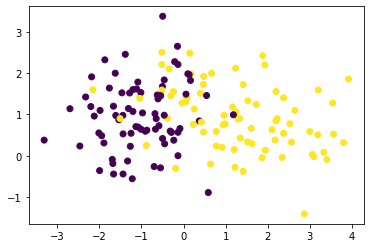

In [25]:
data, classes = make_classification(n_classes= 2, n_samples =150, n_clusters_per_class=1,  n_features = 2, n_redundant=0)
plt.scatter(data[:,0],data[:,1],c=classes)

In [26]:
a=ann(data,classes,1000,0.05)
a.error

(120, 2)


0.11644091301100502

now we ganna plot the curve .......

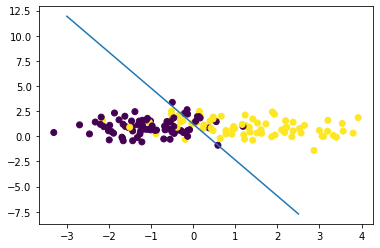

In [27]:
# buy solving the equation the formula of the curve will be like this :
#for any x we have to find y that  : (w1x+w2y+b)=0.5  => y=(0.5-xw1-b)/w2
def y_solve(x,w1,w2,b):
    return (0.5-x*w1-b)/w2
x=np.arange(-3,3,0.5)
y=y_solve(x,a.w[0],a.w[1],a.b)
plt.plot(x,y)
plt.scatter(data[:,0],data[:,1],c=classes)

# for regression task

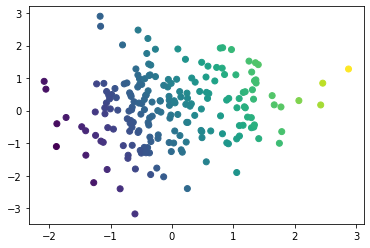

In [57]:
data_x,data_y=make_regression(n_samples=200,n_features=2,bias=20,noise=0.1)
plt.scatter(data_x[:,0],data_x[:,1],c=data_y)


In [58]:
c=ann(data_x,data_y,5000,0.05)
c.error

(160, 2)


0.009530730896215677